In [1]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 19 CarDekho Price Prediction\Cardekho-raw-dataset.csv")
df.head()

,Car_Name,Brand,Model,Vehicle_Age,KM_Driven,Seller_Type,Fuel_Type,Transmission_Type,Mileage,Engine,Max_Power,Seats,Selling_Price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_Name          15411 non-null  object 
 1   Brand             15411 non-null  object 
 2   Model             15411 non-null  object 
 3   Vehicle_Age       15411 non-null  int64  
 4   KM_Driven         15411 non-null  int64  
 5   Seller_Type       15411 non-null  object 
 6   Fuel_Type         15411 non-null  object 
 7   Tranmission_Type  15411 non-null  object 
 8   Mileage           15411 non-null  float64
 9   Engine            15411 non-null  int64  
 10  Max_Power         15411 non-null  float64
 11  Seats             15411 non-null  int64  
 12   Selling_Price    15411 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.5+ MB


In [4]:
df.shape

(15411, 13)

In [5]:
# Check statistics of numerical columns

df.describe()

,Vehicle_Age,KM_Driven,Mileage,Engine,Max_Power,Seats
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000


In [46]:
df.describe(include=['object'])

,Car_Name,Brand,Model,Seller_Type,Fuel_Type,Transmission_Type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [8]:
df['Brand'].nunique()

32

In [6]:
# Check if there is any null value
df.isnull().sum()

Car_Name            0
Brand               0
Model               0
Vehicle_Age         0
KM_Driven           0
Seller_Type         0
Fuel_Type           0
Tranmission_Type    0
Mileage             0
Engine              0
Max_Power           0
Seats               0
 Selling_Price      0
dtype: int64

In [37]:
df.nunique()

Car_Name              121
Brand                  32
Model                 120
Vehicle_Age            24
KM_Driven            3688
Seller_Type             3
Fuel_Type               5
Transmission_Type       2
Mileage               411
Engine                110
Max_Power             342
Seats                   8
Selling_Price        1086
dtype: int64

In [7]:
# Check unique values in brand column
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [9]:
df['Brand'].value_counts()

Brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [10]:
# Check value counts of car
df['Car_Name'].value_counts()

Car_Name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

In [11]:
# Fuel_Type

df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [15]:
df['Fuel_Type'].value_counts(normalize = True) *100

Fuel_Type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

## Visualize individual feature patterns
Generate regression plots for each of the parameters against 'Selling_Price'. Also print the value of correlation of each feature with 'Selling_Price'

In [38]:
df.head()

,Car_Name,Brand,Model,Vehicle_Age,KM_Driven,Seller_Type,Fuel_Type,Transmission_Type,Mileage,Engine,Max_Power,Seats,Selling_Price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


(0.0, 41485591.87759388)

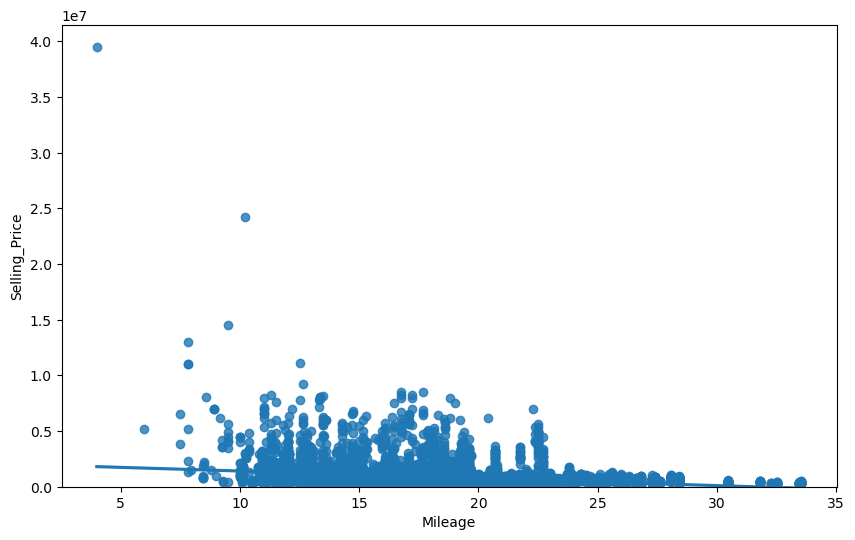

In [39]:
#Mileage plot
plt.figure(figsize = (10,6))
sns.regplot(x='Mileage', y='Selling_Price', data = df)
plt.ylim(0,)

(0.0, 41523452.79303975)

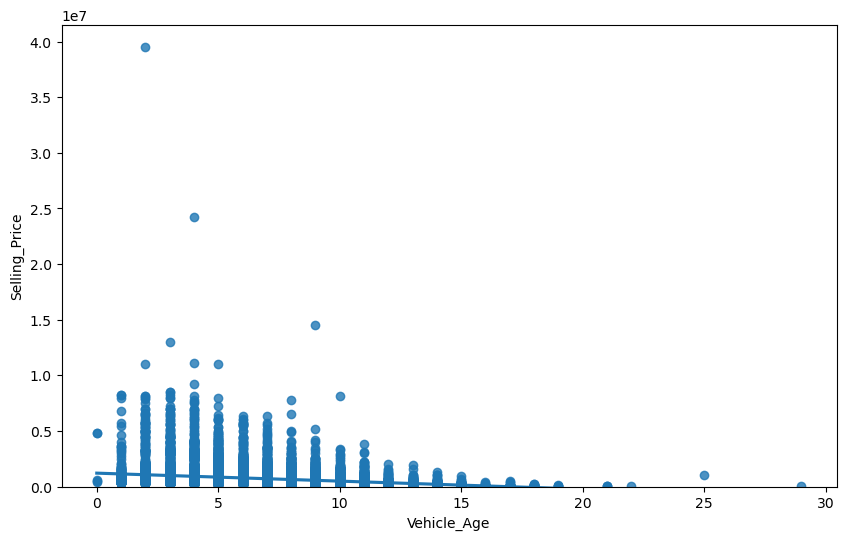

In [40]:
#Mileage plot
plt.figure(figsize = (10,6))
sns.regplot(x='Vehicle_Age', y='Selling_Price', data = df)
plt.ylim(0,)

(0.0, 41922264.89222776)

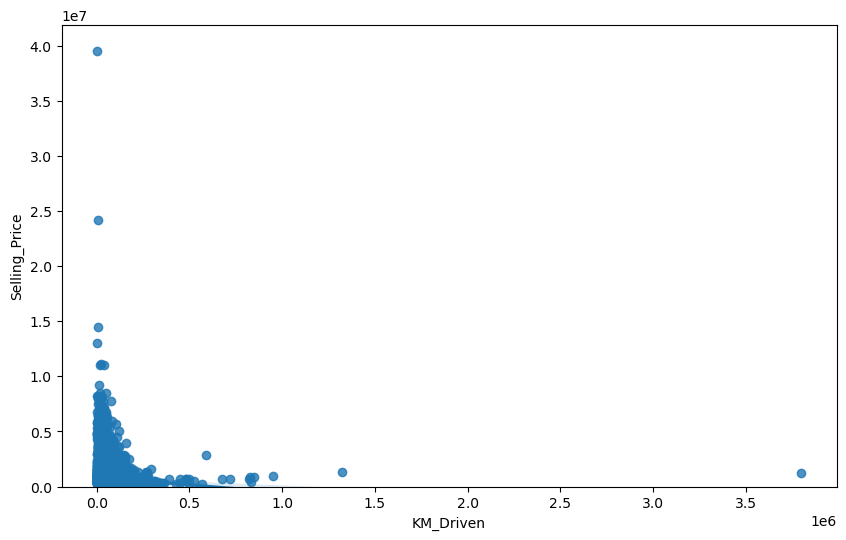

In [41]:
#Mileage plot
plt.figure(figsize = (10,6))
sns.regplot(x='KM_Driven', y='Selling_Price', data = df)
plt.ylim(0,)

(0.0, 41475804.09449656)

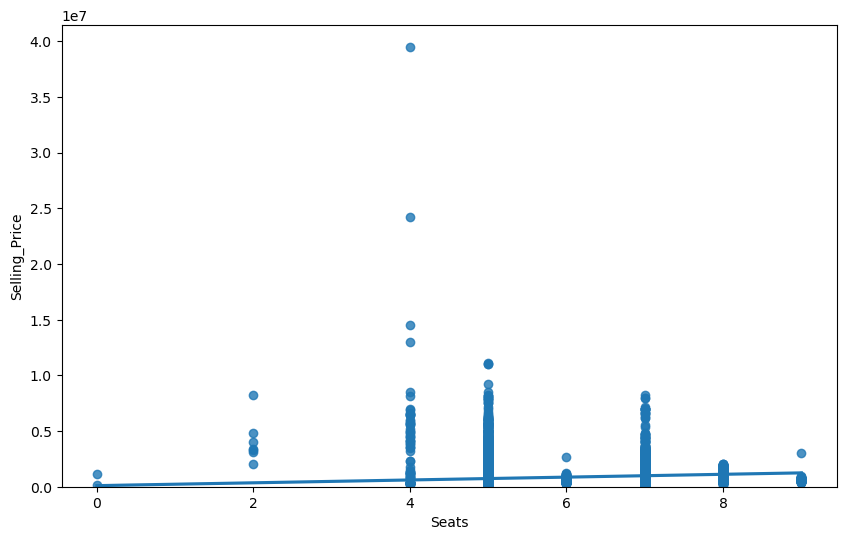

In [42]:
#Mileage plot
plt.figure(figsize = (10,6))
sns.regplot(x='Seats', y='Selling_Price', data = df)
plt.ylim(0,)

In [44]:
for core in ['Mileage','Vehicle_Age','KM_Driven','Seats']:
    print(f"The correlation of Selling_Price and {core} is ",df[[core,'Selling_Price']].corr())

The correlation of Selling_Price and Mileage is                  Mileage  Selling_Price
Mileage        1.000000      -0.305549
Selling_Price -0.305549       1.000000
The correlation of Selling_Price and Vehicle_Age is                 Vehicle_Age  Selling_Price
Vehicle_Age       1.000000      -0.241851
Selling_Price    -0.241851       1.000000
The correlation of Selling_Price and KM_Driven is                 KM_Driven  Selling_Price
KM_Driven        1.00000       -0.08003
Selling_Price   -0.08003        1.00000
The correlation of Selling_Price and Seats is                    Seats  Selling_Price
Seats          1.000000       0.115033
Selling_Price  0.115033       1.000000


"Seats" has 11% positive correlation with Price of Cars. The other has weak correlation with price.

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

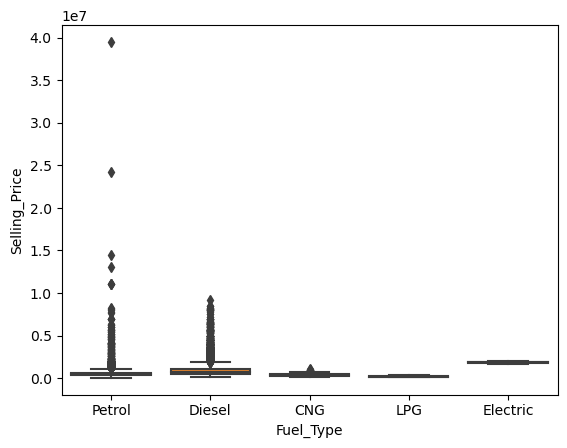

In [45]:
sns.boxplot(x = 'Fuel_Type', y = 'Selling_Price', data = df)

## Group By and Pivot Table

In [47]:
df.groupby('Brand').agg({'Selling_Price':['min','max','mean']})

Selling_Price                        
                        min       max          mean
Brand                                              
Audi                 750000   6800000  1.966865e+06
BMW                  465000   8500000  2.693827e+06
Bentley             5200000  14500000  9.266667e+06
Datsun               170000    650000  3.205176e+05
Ferrari            39500000  39500000  3.950000e+07
Force                700000    700000  7.000000e+05
Ford                 130000   3200000  6.452241e+05
Honda                 50000   3200000  6.177569e+05
Hyundai               60000   2600000  5.761539e+05
ISUZU               1895000   1900000  1.897500e+06
Isuzu               1050000   2300000  1.355000e+06
Jaguar              1299000   6300000  2.643034e+06
Jeep                 800000   5600000  1.795805e+06
Kia                 1080000   3525000  1.735250e+06
Land Rover          1275000   9200000  3.823902e+06
Lexus               3990000   8000000  5.146500e+06
MG                  1488000   2075000  1.752947e+06
Mahindra             100000   2950000  7.874550e+05
Maruti                40000   1225000  4.870893e+05
Maserati            6000000   6200000  6.100000e+06
Mercedes-AMG        5100000   5100000  5.100000e+06
Mercedes-Benz        315000  13000000  2.480742e+06
Mini                1290000   3875000  2.182647e+06
Nissan               440000   1450000  9.553636e+05
Porsche             2000000  11100000  5.161190e+06
Renault              200000   1155000  4.409851e+05
Rolls-Royce        24200000  24200000  2.420000e+07
Skoda                200000   3550000  7.840898e+05
Tata                  70000   1750000  6.835349e+05
Toyota               265000   3650000  1.371317e+06
Volkswagen           173000   1250000  5.165468e+05
Volvo               1200000   8195000  3.729700e+06

In [49]:
grouping = df[['Transmission_Type','Fuel_Type','Selling_Price']]
grouping.head(7)

,Transmission_Type,Fuel_Type,Selling_Price
0,Manual,Petrol,120000
1,Manual,Petrol,550000
2,Manual,Petrol,215000
3,Manual,Petrol,226000
4,Manual,Diesel,570000
5,Manual,Petrol,350000
6,Manual,Petrol,315000


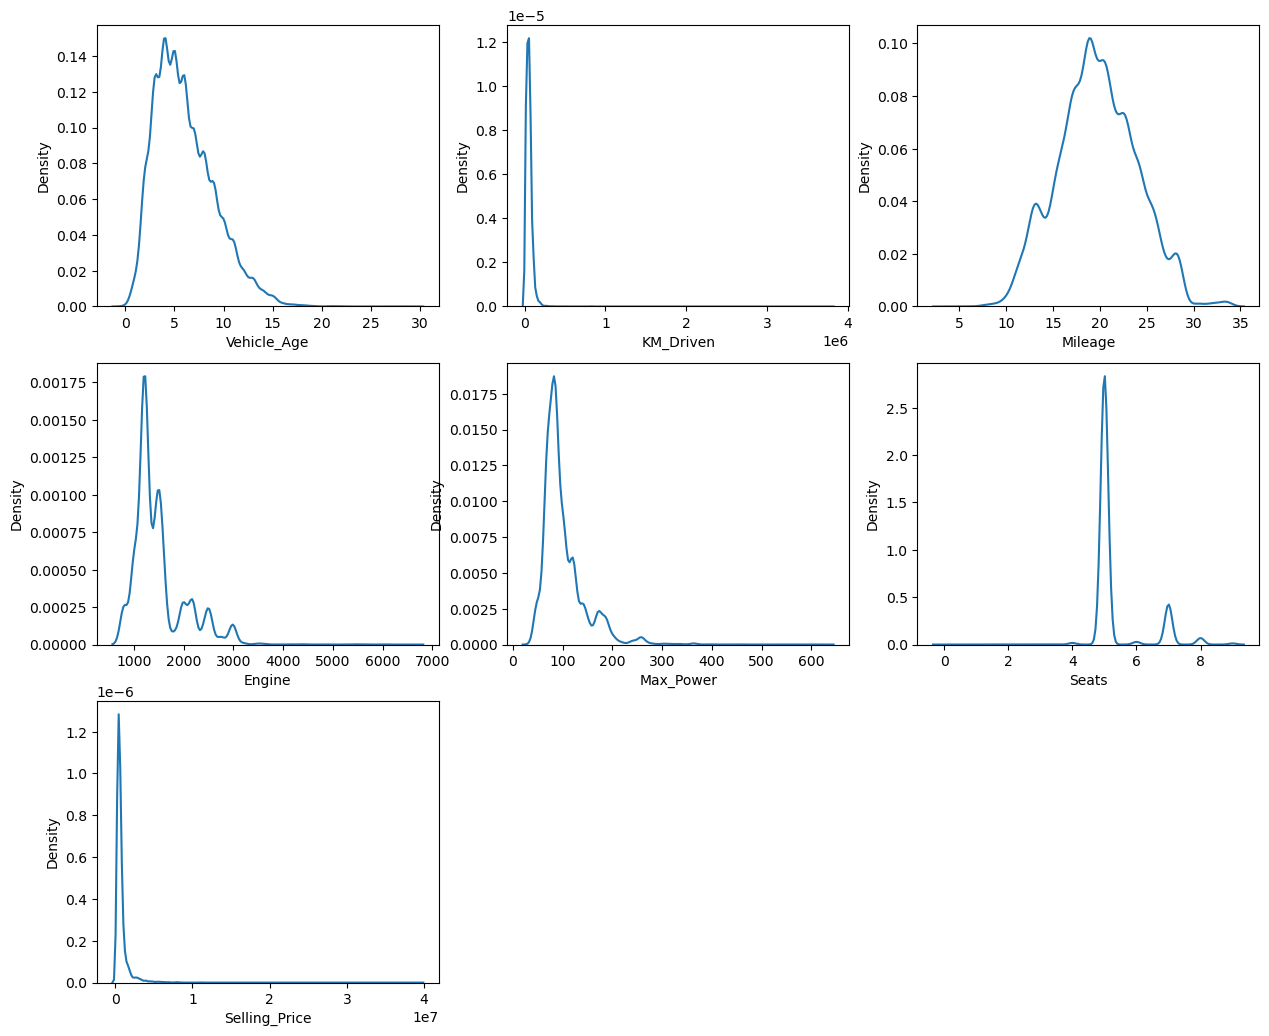

In [33]:
# Plot the density graphs of each of the numerical columns

num_columns = ['Vehicle_Age','KM_Driven','Mileage','Engine','Max_Power','Seats','Selling_Price']
plt.figure(figsize = (15,30))
for i in range(len(num_columns)):
    plt.subplot(7,3, i+1)
    sns.kdeplot(data = df[num_columns[i]])
    

plt.show()

## Overall Insights

### Right-Skewed Variables:
   Variables like <b>KM_Drive, Selling_Price, Max_Power </b> show strong right skewness, indicating a dominace of lower or typical values with a few outliers at the higher end. These variables may require transformation (e.g., lor or square root) if used for modeling.
    
    
### Concentrated Distributions:
   <b>Seats</b> and <b>Vehicle_Age</b> are highly concentrated around typical values (e.g., 5 seats, 0-10 years). This suggest standard consumer preferences for newer vehicles and compact/mid-sized cars.
    
 
### Distinct Vehicle Segments:
   The multimodal nature of <b>engine</b> and the broad range of <b>Max_Power</b> suggest that the dataset includes a mix of vehicle classes (E.g. Compact, SUV, performance)

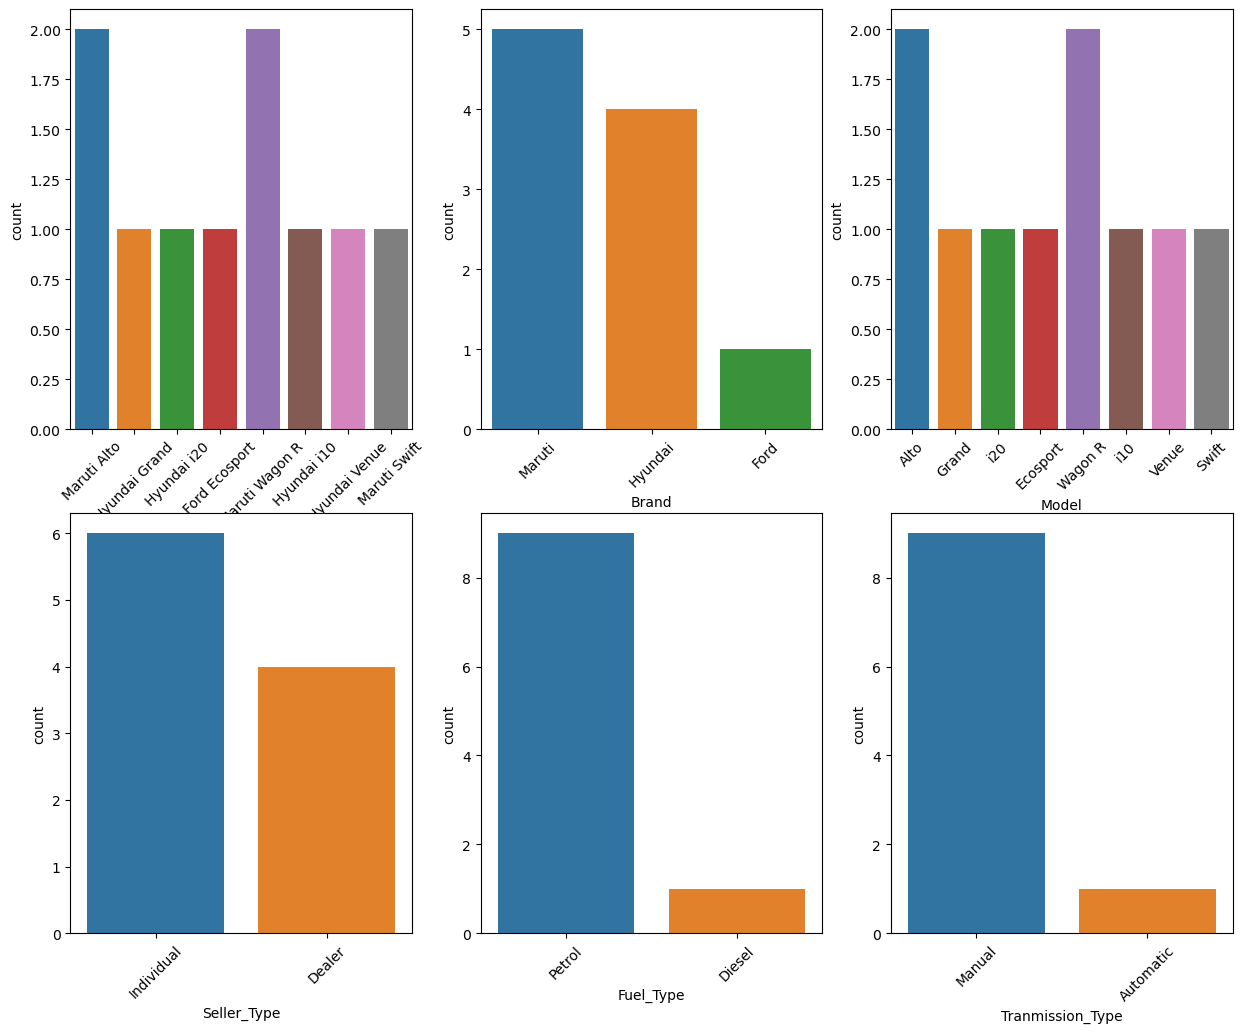

In [24]:
# Plot the countplots of each of the categorical columns

cat_columns = ['Car_Name','Brand','Model','Seller_Type','Fuel_Type','Tranmission_Type']
plt.figure(figsize = (15,12))

for i in range(len(cat_columns)):
    plt.subplot(2,3, i+1)
    plt.xticks(rotation = 45)
    sns.countplot(x = df[cat_columns[i]].head(10))
    
    
plt.show()

# Insights

   - The dataset skews toward <b>manual transmission</b> and <b>petrol-fueled</b> cars sold by individuals.
   - Maruti is the dominant brand, with the <b>Maruti Alto</b> and <b>Hyundai Grand</b> leading among models.
   - <b>Diesel Cars</b> and <b>Automatic Transmissions</b> are underrepresented, potentially indicating limited availability or demand in the dataset.

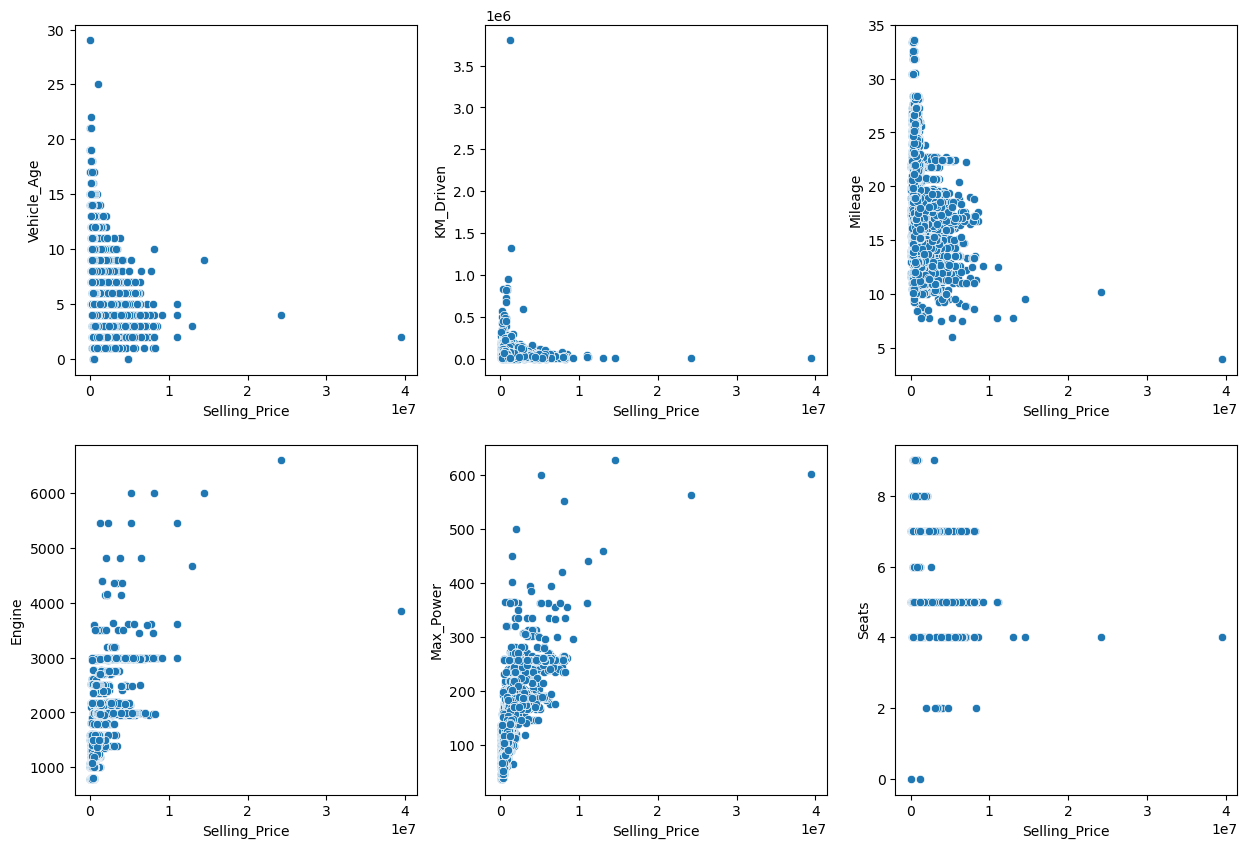

In [34]:
# Plot the relationship of each variable with the selling price

numerical_columns = ['Vehicle_Age','KM_Driven','Mileage','Engine','Max_Power','Seats']

plt.figure(figsize = (15,10))
for i in range(len(numerical_columns)):
    plt.subplot(2,3, i+1)
    sns.scatterplot(data = df, x= 'Selling_Price', y = numerical_columns[i])
    
plt.show()

# Interpretation of the Scatterplots

## 1. Vehicle Age Vs Selling Price
<b>Observation:</b> Older vehicles tend to have lower selling prices, indicating an inverse relationship.
<b>Outliers:</b>Some older vehicle show unusually high selling prices.


## 2. Kilometers Vs Selling Price
<b>Observation:</b>Cars with fewer kilometers driven are priced higher, while cars with high mileage are clustered at lower prices.
<b>Clusters:</b>There's a noticeable cluster at low prices and low mileage.


## 3. Mileage Vs Selling Price
<b>Observation:</b>No Strong correlation is visible. However cars with lower mileage seem to cluster around average selling prices.

## 4. Engine Vs Selling Price
<b>Observation:</b> A positive relationship is visible: cars with larger engine capacities tend to have higher prices.


## 5. Max Power Vs Selling Price
<b>Observation:</b> A positive trend is visible: higher power correlates with higher selling prices.
<b>Outliers:</b>Some extreme outliers are present with very high power values.

## 6. Seats Vs Selling Price
<b>Observation:</b> No clear relationship is visible. Most cars have 4 or 5 seats, but prices don’t vary significantly based on seating capacity.

In [35]:
# Multi-variate analysis- to check the correlation between all the combination of numerical features
num_columns = ['Vehicle_Age','KM_Driven','Mileage','Engine','Max_Power','Seats','Selling_Price']
df[num_columns].corr()


,Vehicle_Age,KM_Driven,Mileage,Engine,Max_Power,Seats,Selling_Price
Vehicle_Age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
KM_Driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
Mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
Engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
Max_Power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
Seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
Selling_Price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

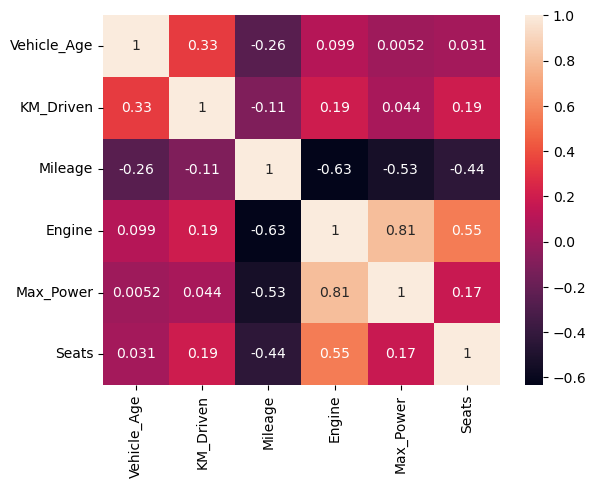

In [36]:
# Plot the heatmap of the correlation between each of the numerical features
sns.heatmap(data = df[numerical_columns].corr(), annot = True)

# Insights

### The Strongest Relationships:
   - Engine vs. Max Power (0.81): Strongly linked, as expected for vehicle specifications.
   - Engine vs. Mileage (-0.63): Indicates a trade-off between performance (engine size) and efficiency (mileage).
   
### The Weakest Relationships:
   - Vehicle Age vs. Max Power (0.0052): No notable effect of age on power.
   - Km Driven vs. Max Power (0.044): Distance traveled doesn't significantly impact the power of the vehicle.

## Simple Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
df.head()

,Car_Name,Brand,Model,Vehicle_Age,KM_Driven,Seller_Type,Fuel_Type,Transmission_Type,Mileage,Engine,Max_Power,Seats,Selling_Price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [56]:
lm = LinearRegression()
lm

LinearRegression()

In [57]:
X = df[['Seats']]
Y = df['Selling_Price']

lm.fit(X,Y)

LinearRegression()

In [58]:
Yhat = lm.predict(X)
Yhat[0:5]

array([733519.93371378, 733519.93371378, 733519.93371378, 733519.93371378,
       733519.93371378])

In [ ]:
# Calculate the root mean squared error for the prediction

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:

# Evaluate Mean Squared Error and R^2 score values for the model

mse_slm = mean_squared_error(df['Selling_Price'],Yhat)
r2_score_slm = lm.score(X,Y)

print('The Mean Squared Error(MSE) for SLR is ', mse_slm)
print('The R-square for Linear Regression is ',r2_score_slm)

The Mean Squared Error(MSE) for SLR is  788835364101.5217
The R-square for Linear Regression is  0.013232560575813235


## Multiple Linear Regression

In [85]:
lm = LinearRegression()
lm

LinearRegression()

In [86]:
df.head()

,Car_Name,Brand,Model,Vehicle_Age,KM_Driven,Seller_Type,Fuel_Type,Transmission_Type,Mileage,Engine,Max_Power,Seats,Selling_Price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [87]:
Z = df[['Mileage','Seats','KM_Driven','Vehicle_Age','Engine']]

Y = df['Selling_Price']

In [88]:
lm.fit(Z,Y)

LinearRegression()

In [89]:
Y_hat = lm.predict(Z)
Y_hat[0:5]

array([-379374.14201487,  640847.410347  ,   80682.04849263,
         -6108.25448964,  918044.14265741])

C:\Users\Aayush\AppData\Local\Temp\ipykernel_19172\1573115825.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Selling_Price'], hist = False, color = 'r', label = 'Actual Price')
C:\Users\Aayush\AppData\Local\Temp\ipykernel_19172\1573115825.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

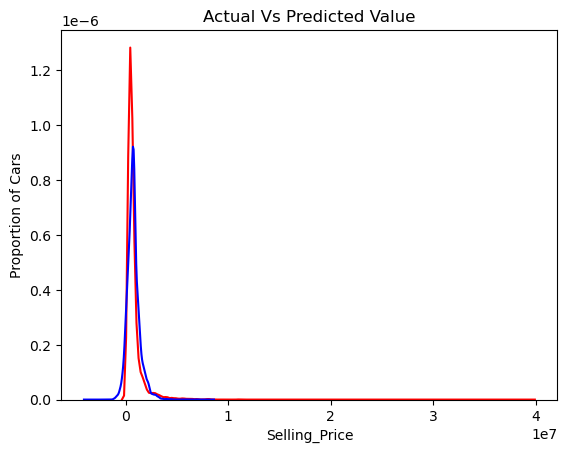

In [90]:

# Distribution plot of the predicted values and Actual values

ax1 = sns.distplot(df['Selling_Price'], hist = False, color = 'r', label = 'Actual Price')
sns.distplot(Y_hat, hist = False, color = 'b', label ='Predicted Value', ax = ax1)

plt.title('Actual Vs Predicted Value')
plt.xlabel('Selling_Price')
plt.ylabel('Proportion of Cars')
plt.show()

In [92]:
mse_mlr = mean_squared_error(Y,Y_hat)
r2_score_mlr = lm.score(Z,Y)

print('The mean sqaured error(MSE) of MLR is ',mse_mlr)
print('The R-squared for MLR is ', r2_score_mlr)

The mean sqaured error(MSE) of MLR is  394484603215.20087
The R-squared for MLR is  0.5065325674764849


In [65]:
#Create a copy of the dataframe to model the data

model_data = df.copy()
model_data.head()

,Car_Name,Brand,Model,Vehicle_Age,KM_Driven,Seller_Type,Fuel_Type,Transmission_Type,Mileage,Engine,Max_Power,Seats,Selling_Price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [66]:
#Drop the noise in the data

model_data.drop(labels = ['Car_Name','Brand','Model','Seller_Type'], axis = 1, inplace = True)
model_data.head()

,Vehicle_Age,KM_Driven,Fuel_Type,Transmission_Type,Mileage,Engine,Max_Power,Seats,Selling_Price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [67]:
# Convert the categorical variables into a set of binary(0,1)
model_data = pd.get_dummies(model_data, dtype = int)
model_data.head()

,Vehicle_Age,KM_Driven,Mileage,Engine,Max_Power,Seats,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Type_Automatic,Transmission_Type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,0,0,0,0,1


In [68]:
x = model_data.drop('Selling_Price', axis = 1)
x.head()

,Vehicle_Age,KM_Driven,Mileage,Engine,Max_Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Type_Automatic,Transmission_Type_Manual
0,9,120000,19.70,796,46.30,5,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,0,1,0,0,0,0,1


In [69]:
y = model_data['Selling_Price']
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: Selling_Price, dtype: int64

In [25]:
# Divide data into Train & Test Data

from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print('Number of test sample: ',x_test.shape[0])
print('Number of train sample: ',x_train.shape[0])

Number of test sample:  4624
Number of train sample:  10787


In [27]:
# import Linear Regression module

from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()
lr

LinearRegression()

In [77]:
lr.fit(x_train,y_train)

LinearRegression()

In [78]:
y_hat = lr.predict(x_test)
y_hat[0:5]

array([ 525917.47336543,  740667.06967279,  612856.53445895,
       1705184.54320155,  197987.63545307])

In [79]:
x_test['Predicted_sales_price'] = y_hat

x_test['Actual_Price'] = y_test

# Calculate the difference between the predicted sales price and the actual price
x_test['Difference'] = x_test['Predicted_sales_price'] - x_test['Actual_Price']

# Display the predicted sales price, actual price and the difference
x_test[['Predicted_sales_price', 'Actual_Price', 'Difference']]

,Predicted_sales_price,Actual_Price,Difference
7386,5.259175e+05,710000,-1.840825e+05
4904,7.406671e+05,841000,-1.003329e+05
5835,6.128565e+05,350000,2.628565e+05
6012,1.705185e+06,1000000,7.051845e+05
5187,1.979876e+05,380000,-1.820124e+05
...,...,...,...
2034,1.238141e+04,245000,-2.326186e+05
12788,4.282864e+05,500000,-7.171365e+04
5590,5.177693e+06,3800000,1.377693e+06
8177,2.089678e+06,1600000,4.896777e+05


C:\Users\Aayush\AppData\Local\Temp\ipykernel_19172\4000989240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Selling_Price'], hist = False, color = 'r', label = 'Actual Price')
C:\Users\Aayush\AppData\Local\Temp\ipykernel_19172\4000989240.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

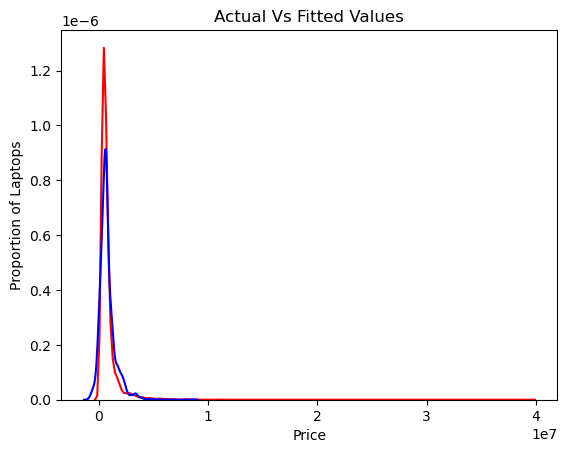

In [80]:
# Distribution plot of the predicted values and Actual values

ax1 = sns.distplot(df['Selling_Price'], hist = False, color = 'r', label = 'Actual Price')
sns.distplot(y_hat, hist = False, color = 'b', label ='Predicted Value', ax = ax1)

plt.title('Actual Vs Fitted Values')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.show()

In [83]:
mse = mean_squared_error(y_test,y_hat)
r2_score = lr.score(x,y)

print('The mean sqaured error(MSE) is ',mse)
print('The R-squared for MLR is ', r2_score)

The mean sqaured error(MSE) of MLR is  253993310306.44604
The R-squared for MLR is  0.6291581447368295


In [36]:
# Calculate the root mean squared error for the prediction
mse = []
mse.append(mean_squared_error(y_true = y_test, y_pred = y_hat))

rmse = []
rmse.append(np.sqrt(mse[0]))

print(f"The Root Mean Squared Error is : {rmse[0].round(2)}")

The Root Mean Squared Error is : 497506.96
